## Etapa 11 - Nuvem de Palavras

Nesta ultima etapa do projeto vamos criar uma nuvem de palavras onde poderemos extrair insights sobre o que estão falando bem e o que estão falando mal das empresas escolhidas em um determinado periodo de tempo. 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('dataset_com_sentimento.csv', index_col=0)

In [3]:
df.tail(10)

,in_reply_to_screen_name,full_text,sentimento,sentimento_CNN,sentimento_RNN,pesos_RNN,sentimento_medio
132365,Bancointer,e necessario possuir patrimonio para abrir a ...,0,1,0,0.001743,0
132366,Bancointer,mas se nao prencho ele nao deixa continuar o ...,0,0,0,0.007396,0
132367,CocaCola_Br,bela camisa,1,1,1,0.784599,1
132368,CocaCola_Br,sobre o atendimento e vip o cliente nao pode ...,0,0,0,0.165559,0
132369,amazonBR,como ganha um desses,0,0,1,0.994699,0
132370,amazonBR,tambem naoficosem livros,1,1,1,0.592652,1
132371,amazonBR,voces me confirmam se esse e mail foi enviado...,0,0,0,0.002341,0
132372,santander_br,me obrigou a atualizar o ap e agora so serve ...,0,0,0,0.050323,0
132373,Bancointer,decepcao nao ter opcao para pagar darf sem co...,0,0,0,0.001286,0
132374,Bradesco,o deposito expresso caso na hora mesmo nos fi...,1,0,0,0.050321,0


In [4]:
# excluindo tweets com pesos intermediarios
df = df[(df["pesos_RNN"] > 0.9) | (df["pesos_RNN"] < 0.1)]

In [109]:
# funcao para plotar as nuvens de plavras
def plot_cloud(wordcloud_positivo, wordcloud_negativo, arroba):
    # tamanho da figura
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    # exibindo as imagens em paralelo
    axes[0].imshow(wordcloud_positivo, interpolation="bilinear")
    axes[1].imshow(wordcloud_negativo, interpolation="bilinear")
    # removendo detalhes dos eixos
    axes[0].axis("off")
    axes[1].axis("off")
    fig.suptitle(arroba, fontweight ="bold", fontsize=36)
    #plt.savefig(arroba+'.png')

In [6]:
# funcao para transformar uma lista de frases em um unico banco de palavras
def gera_texto_txt(nome_arquivo_txt, lista_tweets):
    with open(nome_arquivo_txt, 'w+', encoding='utf-8') as arquivo:
        for frase in lista_tweets:
            arquivo.write(frase)
    with open(nome_arquivo_txt, 'r', encoding='utf-8') as arq_entrada:
        conteudo = arq_entrada.read()
    return conteudo

In [110]:
# funcao que monta a nuvem de palavras
def gera_nuvem(arroba):
    df_empresa_pos = df[(df["in_reply_to_screen_name"] == arroba) & (df["sentimento_RNN"] == 1)] 
    text_pos = gera_texto_txt('texto_pos.txt', df_empresa_pos['full_text'])
    
    df_empresa_neg = df[(df["in_reply_to_screen_name"] == arroba) & (df["sentimento_RNN"] == 0)] 
    text_neg = gera_texto_txt('texto_neg.txt', df_empresa_neg['full_text'])
    
    
    # Gera Nuven Positiva
    nuvem_positiva = WordCloud(background_color='green', max_words= 50, width = 400, height = 200,         
                       random_state=1,collocations=False, stopwords = stopwordss).generate(text_pos)
    
    nuvem_positiva.recolor(color_func = white_color_func)
    
    # Gera Nuven Negativa
    nuvem_negativa = WordCloud(background_color='red', max_words= 50, width = 400, height = 200,
                      random_state=1,collocations=False, stopwords = stopwordss).generate(text_neg)
    
    nuvem_negativa.recolor(color_func = white_color_func)
    
    plot_cloud(nuvem_positiva, nuvem_negativa, arroba)
    
    return nuvem_positiva, nuvem_negativa

In [8]:
#funcao para gerar em lote
def gera_nuvem_lote(lista_arroba):
    for arroba in lista_arroba:
        gera_nuvem(arroba)

In [92]:
#funcoes para colorir o texto
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

def white_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 100%)")

In [104]:
#importando o padrao de stopwords da biblioteca
stopwordss = []
stopwordss = stopwords.words('portuguese')
#acrescentando novos
novos_stopwords = ['nunca','sempre','agora','nada','tudo','todo','toda','varios','varias','sim','nao','fico','fica',
                   'obrigado','obrigada','bom','mau','ruim','otimo','bem','certo','errado','boa','ok',
                   'vc','vcs','voce','voces','nos','oi','ola','tambem','outro','outra','primeiro','primeira',                  
                   'ja', 'ai','pq','ta','ate','pra','so','oes','to','dm','mim','pro','pf','gt','ne','tb','tbm',
                   'ser','ter','fazer','faz','vou','vai','fiz','quero','consigo','consegui','fico','preciso','sao',
                   'tentando','queria','vem','deu','pode','ir','faco','ha','estao','ver','tao','sei','la','podem',                   
                   'ano','anos','dia','dias','hoje','hora','mes','ficar','lembro','entao','dar','vez',
                   'ainda','ap','app','banco','vezes','aqui','assim', 'coisa']
stopwordss.extend(novos_stopwords)

In [14]:
# listas para geração em lote
lista_bancos = ['Bancointer','nubank', 'santander_br', 'Bradesco','C6Bank','BancodoBrasil','itau','timeneon']
lista_streamers= ['NetflixBrasil','PrimeVideoBR', 'globoplay', 'DisneyPlusBR']
lista_b2c = ['submarino','americanascom','pontofrio','CasasBahia','amazonBR']

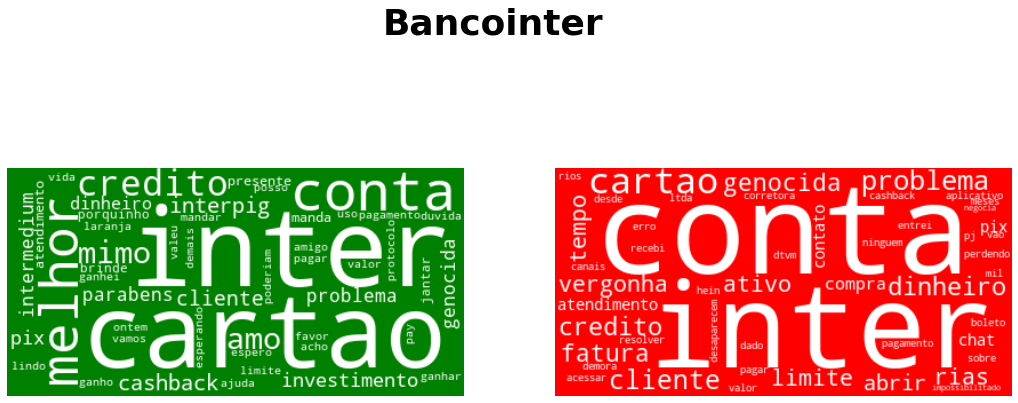

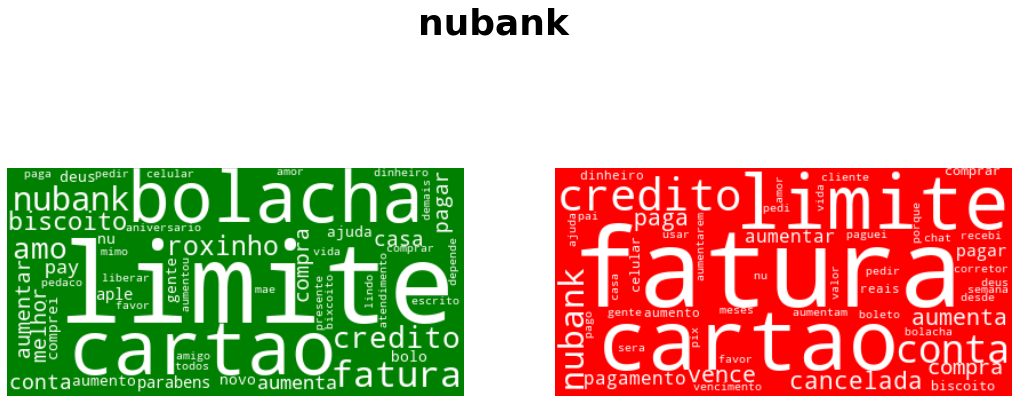

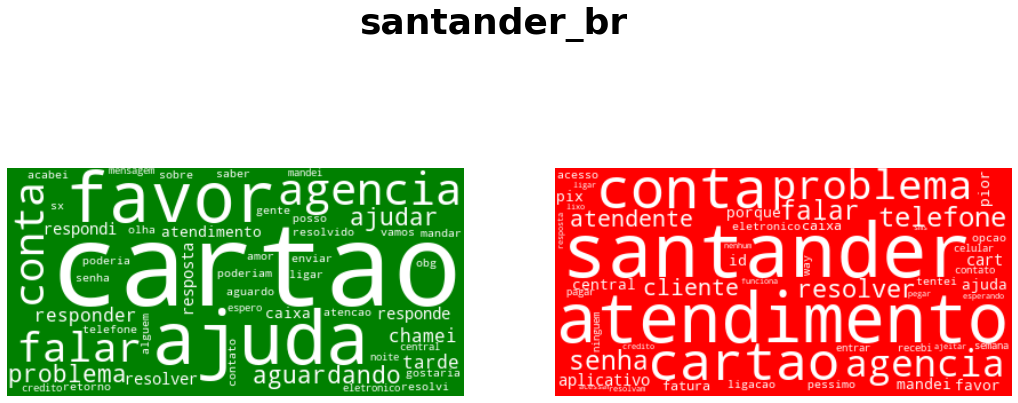

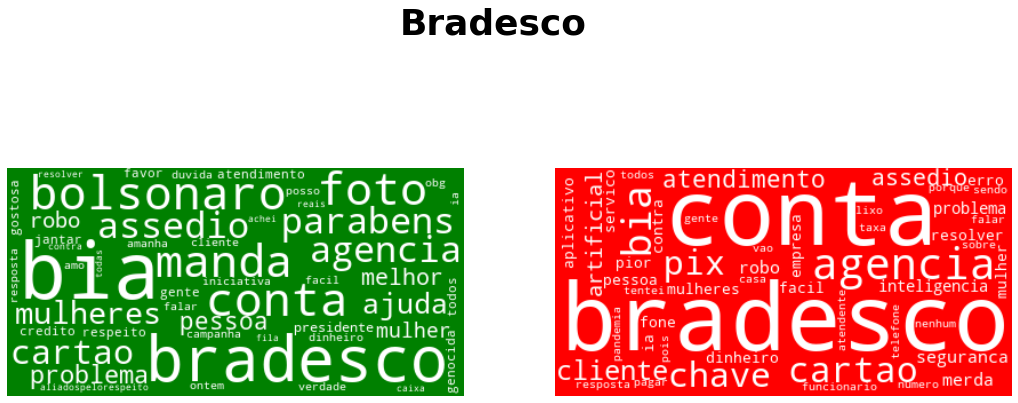

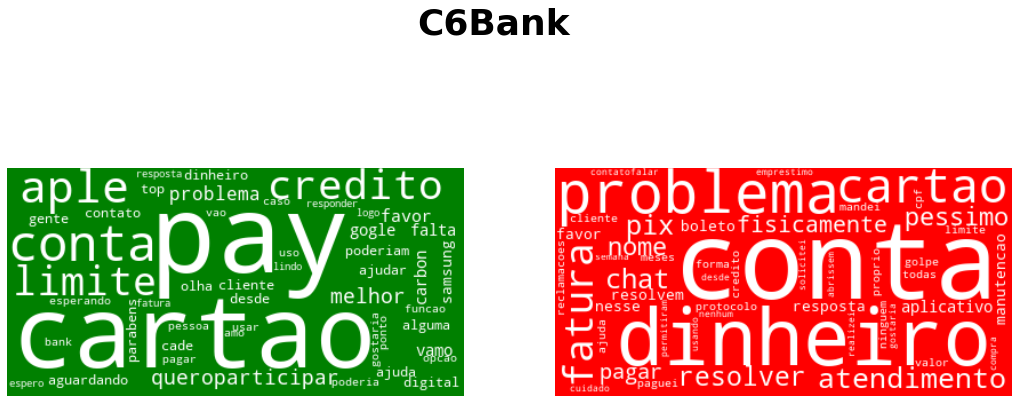

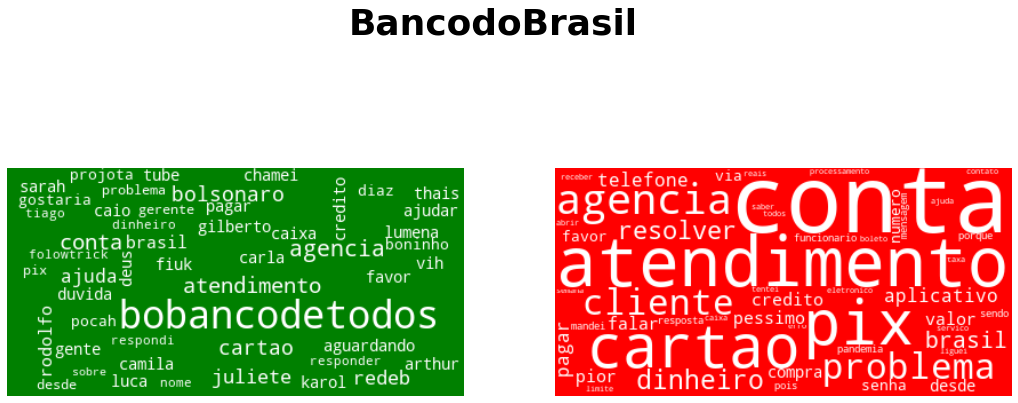

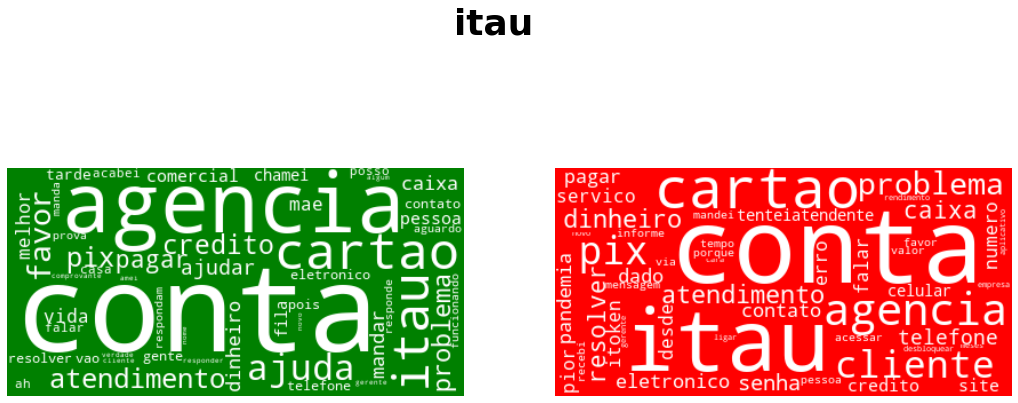

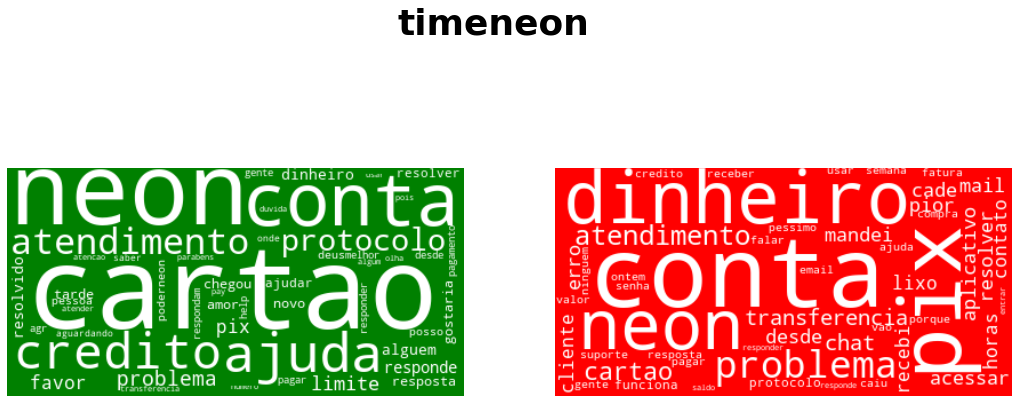

In [106]:
_ = gera_nuvem_lote(lista_bancos)

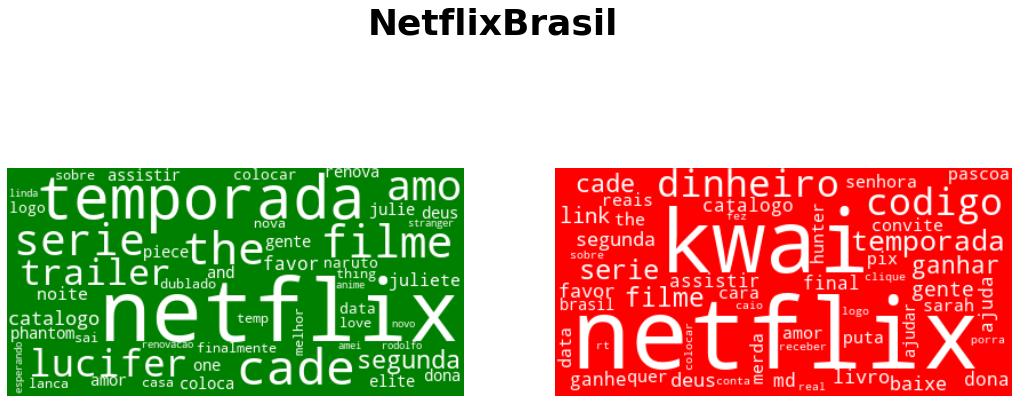

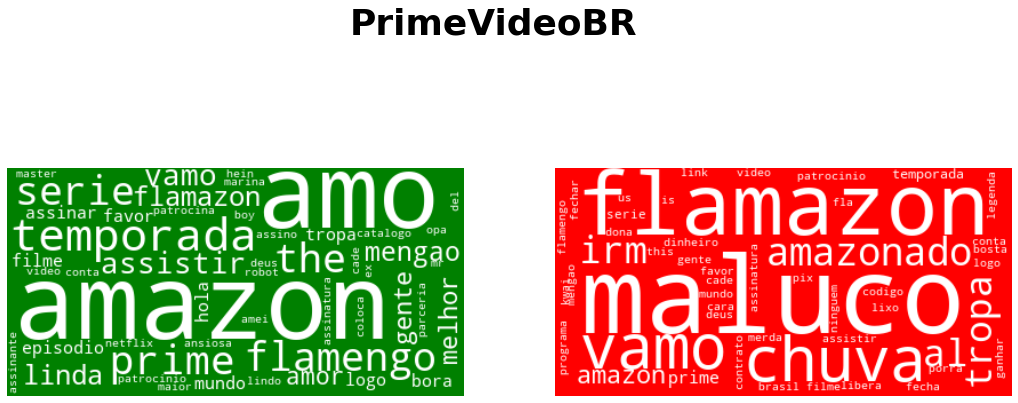

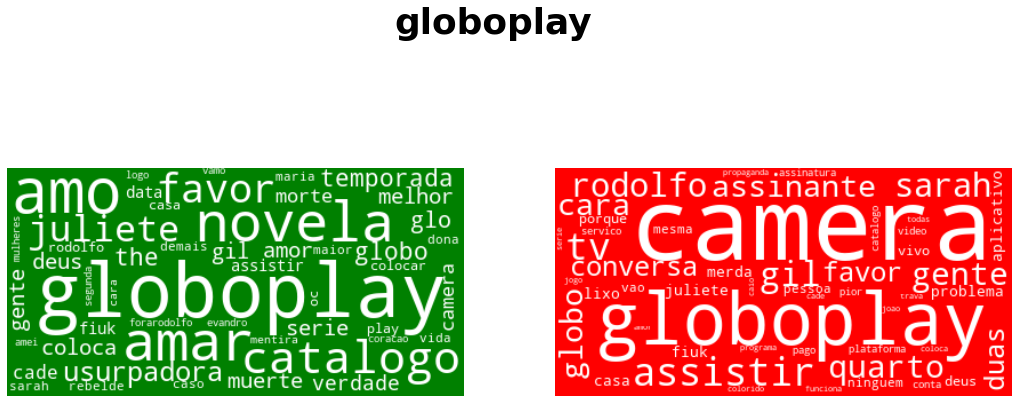

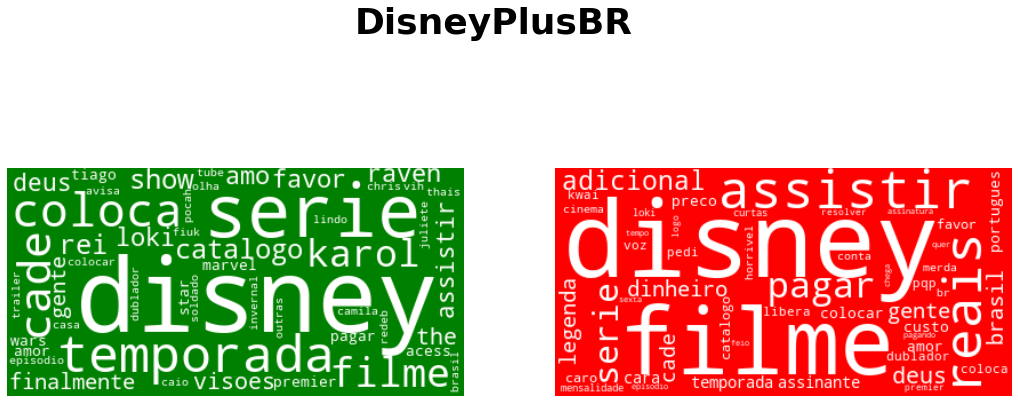

In [107]:
_ = gera_nuvem_lote(lista_streamers)

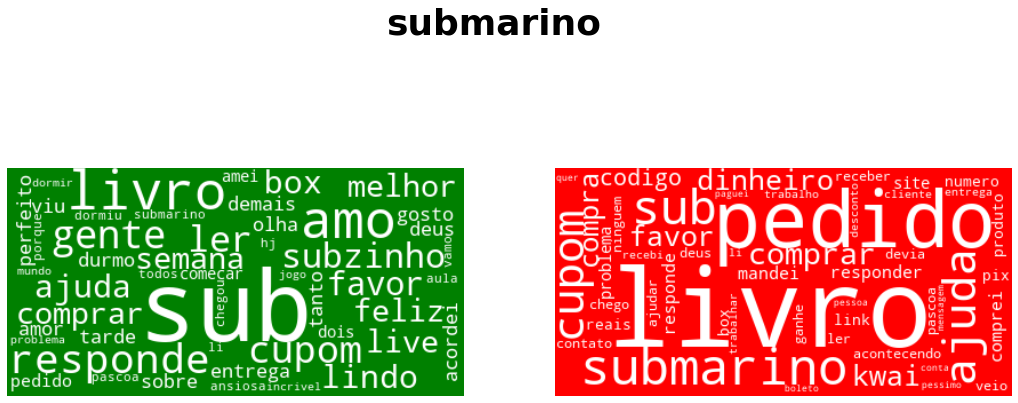

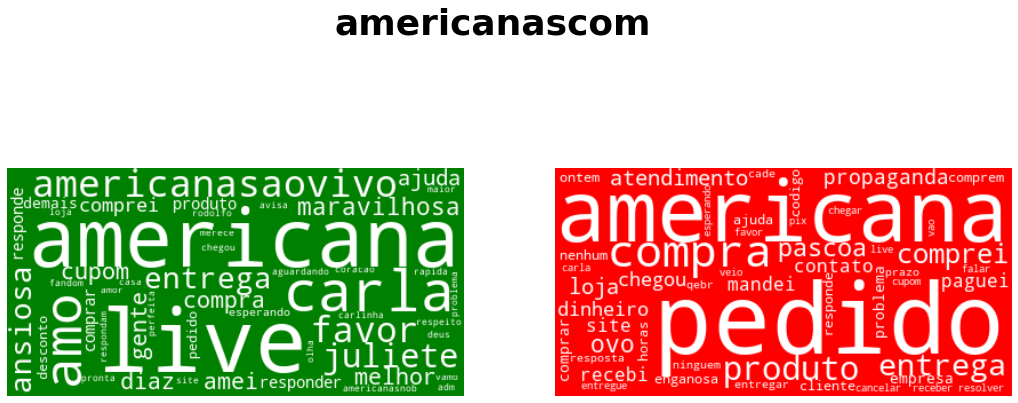

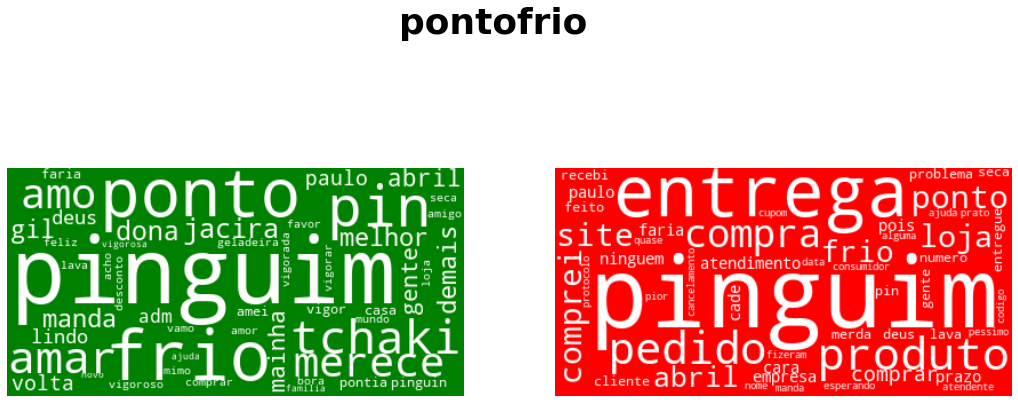

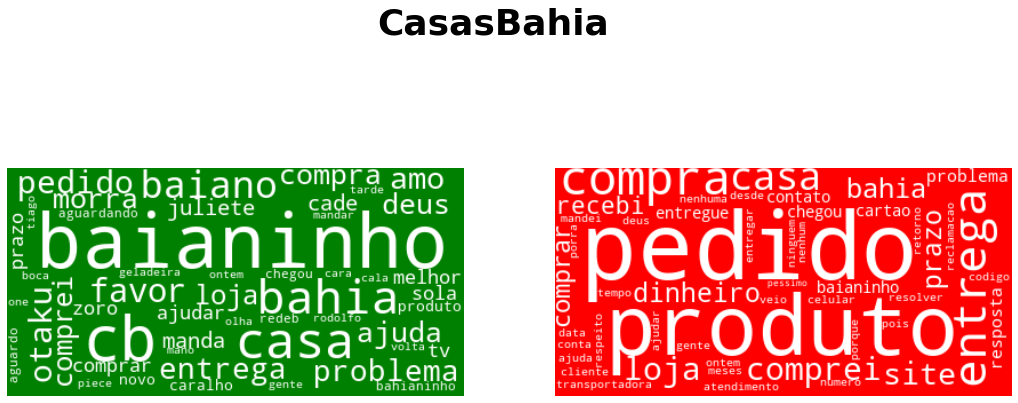

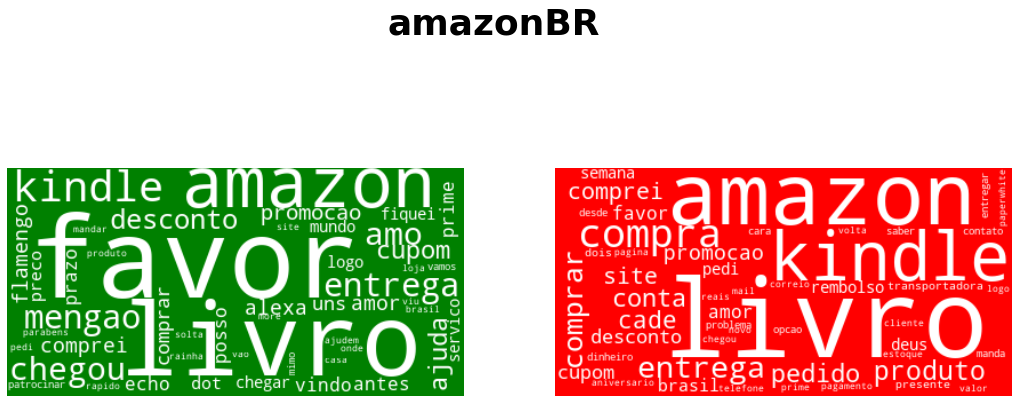

In [108]:
_ = gera_nuvem_lote(lista_b2c)

Devido a informalidade dos tweets, e o fato de terem sido coletados em um horario que talvez não tivesse alguma postagem direcionando os comentarios, algumas nuvens não ficaram tão claras, mas mesmo assim é possivel tirar alguns insights.